In [206]:
# import packages packages yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [207]:
df_train = pd.read_csv("/content/drive/MyDrive/Rakamin dataset/application_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Rakamin dataset/application_test.csv")

In [208]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [210]:
df_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

### Data Cleaning

In [211]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep]

clean_dataset(df_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [212]:
df_train.reset_index(inplace=True)

In [213]:
df_train.drop("index", axis=1, inplace=True)

In [214]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
8598,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8599,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
8600,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [215]:
clean_dataset(df_test).reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [216]:
df_test.drop("index", axis=1, inplace=True)
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100107,Cash loans,M,Y,Y,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
1,100128,Cash loans,F,Y,Y,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
2,100561,Cash loans,M,Y,Y,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,100699,Cash loans,M,Y,Y,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100770,Cash loans,M,Y,N,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,455243,Cash loans,F,Y,Y,1,112500.0,252531.0,26005.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1735,455607,Cash loans,M,Y,Y,0,387000.0,350415.0,25051.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
1736,455703,Cash loans,F,Y,Y,1,450000.0,790830.0,57676.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1737,455940,Cash loans,M,Y,Y,0,202500.0,225000.0,19242.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0


In [217]:
df_train = df_train.select_dtypes(include='number')
df_test = df_test.select_dtypes(include='number')

In [218]:
df_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100107,0,180000.0,296280.0,21690.0,225000.0,0.032561,-13563,-1007,-5719.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
1,100128,1,225000.0,431280.0,23526.0,360000.0,0.025164,-10962,-1883,-99.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
2,100561,0,180000.0,67500.0,8140.5,67500.0,0.015221,-11819,-2612,-9781.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,100699,1,225000.0,323460.0,23134.5,270000.0,0.020246,-13444,-1659,-2988.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100770,0,202500.0,697500.0,33687.0,697500.0,0.015221,-8819,-852,-2751.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,455243,1,112500.0,252531.0,26005.5,234000.0,0.016612,-10205,-2038,-4491.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1735,455607,0,387000.0,350415.0,25051.5,292500.0,0.025164,-20876,-4409,-6678.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
1736,455703,1,450000.0,790830.0,57676.5,675000.0,0.035792,-9952,-1437,-1376.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1737,455940,0,202500.0,225000.0,19242.0,225000.0,0.010006,-10159,-632,-3507.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0


In [219]:
df_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,0,2,112500.0,361462.5,16051.5,274500.0,0.025164,-15006,-1105,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
8598,456084,0,1,99000.0,675000.0,21906.0,675000.0,0.020246,-14007,-2021,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8599,456140,1,1,261000.0,711454.5,47673.0,643500.0,0.018850,-11407,-1641,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
8600,456195,0,0,94500.0,270000.0,15075.0,270000.0,0.028663,-20246,-5452,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


# EDA

In [220]:
df_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPAR

In [221]:
df_test.columns.values

array(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG

In [222]:
col = ['DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [223]:
df_train.drop(col, axis=1, inplace=True)
df_test.drop(col, axis=1, inplace=True)

In [224]:
df_test.describe(include='all')

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH
count,1739.000000,1739.000000,1.739000e+03,1.739000e+03,1739.000000,1.739000e+03,1739.000000,1739.000000
mean,275115.886717,0.612996,2.339756e+05,6.644330e+05,35229.431282,6.037845e+05,0.024186,-14476.511788
std,104424.592035,0.784834,1.246777e+05,4.704811e+05,19180.893448,4.397274e+05,0.016875,3199.153019
min,100107.000000,0.000000,5.400000e+04,4.500000e+04,2295.000000,4.500000e+04,0.001276,-24825.000000
25%,184244.000000,0.000000,1.575000e+05,3.014640e+05,21798.000000,2.497500e+05,0.010643,-16707.000000
50%,271806.000000,0.000000,2.025000e+05,5.391000e+05,31059.000000,4.635000e+05,0.020713,-14284.000000
75%,364425.000000,1.000000,2.700000e+05,8.955000e+05,46541.250000,7.875000e+05,0.030755,-11921.000000
max,455959.000000,4.000000,1.350000e+06,2.156400e+06,177696.000000,1.800000e+06,0.072508,-8049.000000


In [225]:
df_train.describe(include='all')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000


array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>],
       [<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>]], dtype=object)

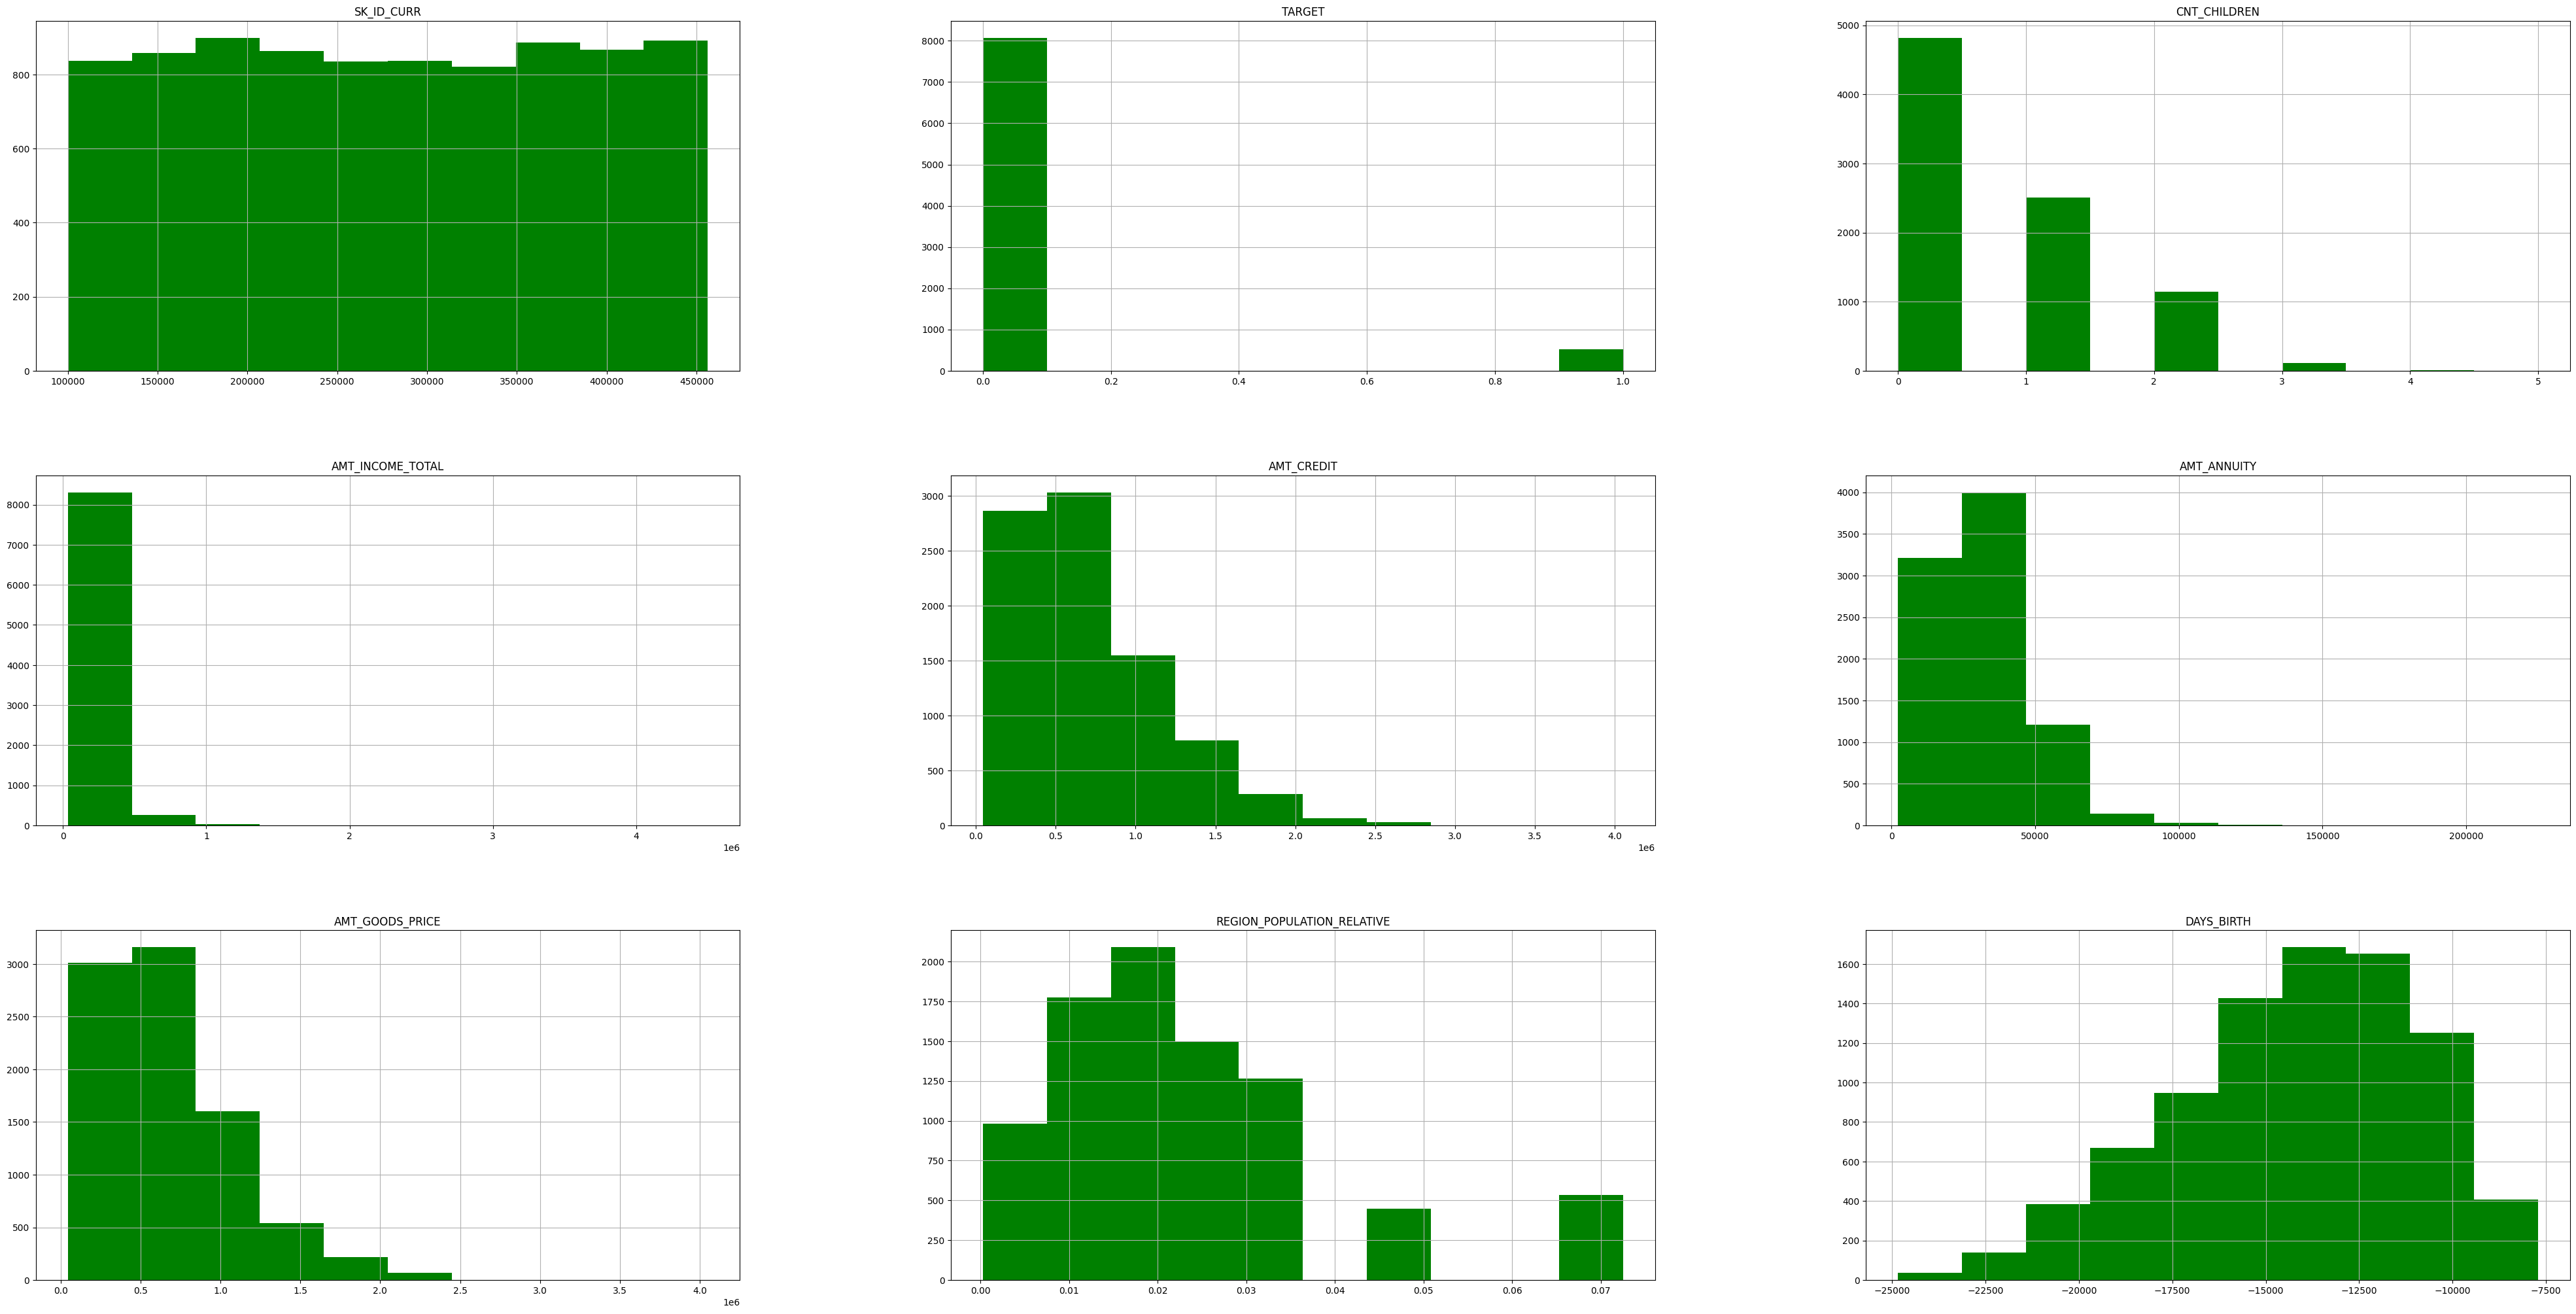

In [226]:
df_train.hist(figsize=(50,25),color='green')

terlihat bahwa distribusi data tidak normal dan data lebih banyak mengarah ke arah kanan

In [227]:
corr = df_train.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH
SK_ID_CURR,1.000000,0.015474,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,-0.006509,0.006310
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108
CNT_CHILDREN,0.005075,-0.019993,1.000000,-0.023069,-0.015191,-0.020395,-0.021157,-0.025688,0.175747
AMT_INCOME_TOTAL,-0.011396,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.354556,0.211133,-0.119206
AMT_CREDIT,-0.013768,-0.014634,-0.015191,0.348575,1.000000,0.751587,0.987994,0.110804,-0.198152
AMT_ANNUITY,-0.032327,-0.000765,-0.020395,0.415807,0.751587,1.000000,0.756896,0.142985,-0.151530
AMT_GOODS_PRICE,-0.016785,-0.021950,-0.021157,0.354556,0.987994,0.756896,1.000000,0.109844,-0.198316
REGION_POPULATION_RELATIVE,-0.006509,-0.021225,-0.025688,0.211133,0.110804,0.142985,0.109844,1.000000,-0.060821
DAYS_BIRTH,0.006310,0.041108,0.175747,-0.119206,-0.198152,-0.151530,-0.198316,-0.060821,1.000000


In [228]:
df_train.TARGET.value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

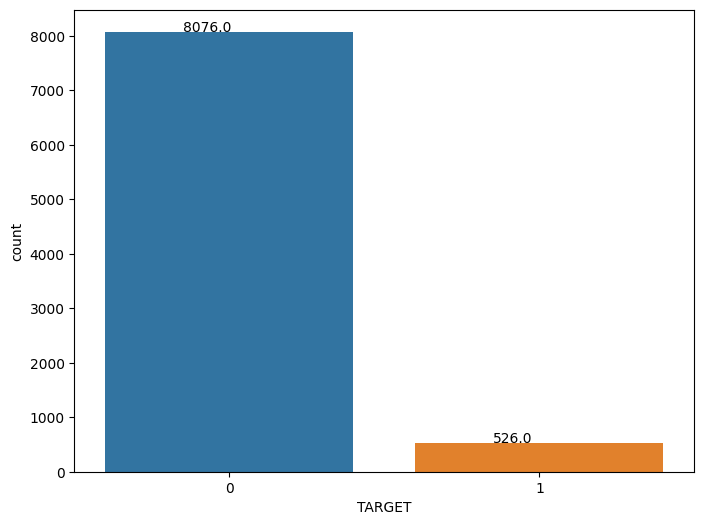

In [229]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df_train, x = 'TARGET', order=df_train['TARGET'].value_counts(ascending=False).index)

# Add annotations to the plot
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [230]:
train_age=(df_train['DAYS_BIRTH']/-365).astype(int)
train_used=df_train.assign(AGE=train_age).drop('DAYS_BIRTH',axis=1)
train_used.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE
0,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,42
1,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,44
2,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,31
3,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,38
4,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,31


In [231]:
usia = train_used[['TARGET', 'AGE']]
usia['GRUP_UMUR'] = pd.cut(usia['AGE'], bins = np.linspace(20, 70, num=6))
usia = (usia.groupby(['GRUP_UMUR']).mean()).sort_values('TARGET')
usia

<ipython-input-231-74d78c8ddfe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usia['GRUP_UMUR'] = pd.cut(usia['AGE'], bins = np.linspace(20, 70, num=6))


,TARGET,AGE
GRUP_UMUR,,
"(60.0, 70.0]",0.038462,62.846154
"(40.0, 50.0]",0.045614,44.758333
"(50.0, 60.0]",0.058296,54.281390
"(30.0, 40.0]",0.062323,35.480170
"(20.0, 30.0]",0.080681,27.168496


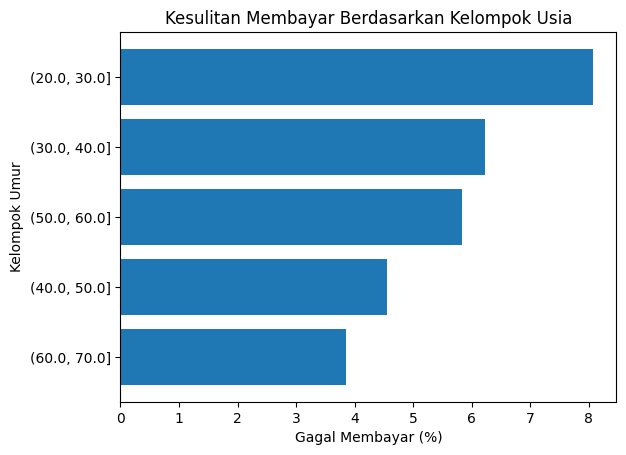

In [205]:
usia.sort_values(by='TARGET', inplace=True)

plt.barh(y=usia.index.astype(str), width=100*usia["TARGET"])
plt.xlabel("Gagal Membayar (%)")
plt.ylabel("Kelompok Umur")
plt.title("Kesulitan Membayar Berdasarkan Kelompok Usia")
plt.show()

# MODELLING

In [232]:
X = df_train.drop(columns=["SK_ID_CURR","TARGET"])
y = df_train["TARGET"]

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6881, 7), (1721, 7), (6881,), (1721,))

## Logistic Regression

In [234]:
lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr.fit(X_train,y_train)

LogisticRegression()

In [235]:
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)

params = {'penalty':['l1','l2', 'elasticnet'],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          "C": [100, 10, 1.0, 0.1, 0.01]}

grid_search_model = GridSearchCV(lr, params, cv=kfold)
grid_search_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Incr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [236]:
grid_search_model.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [237]:
model1 = grid_search_model.best_estimator_
model1.fit(X_train,y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [238]:
predict1 = model1.predict(X_test)
pd.DataFrame(predict1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1716,0
1717,0
1718,0
1719,0


In [239]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,predict1)
print("accuracy:", accuracy*100)
c_f1 = metrics.classification_report(y_test,predict1)
print(c_f1)

accuracy: 94.53805926786751
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [240]:
DT = DecisionTreeClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [241]:
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

In [197]:
DT = DecisionTreeClassifier(random_state=42)
grid_search_model1 = GridSearchCV(DT, hyperparameters, cv=kfold)
grid_search_model1.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 4, 8, 12, 16, 19, 23, 27, 31, 34, 38,
                                       42, 46, 49, 53, 57, 61, 64, 68, 72, 76,
                                       79, 83, 87, 91, 94, 98, 102, 106, 110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 100]})

In [198]:
grid_search_model1.best_params_

{'max_depth': 1,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [199]:
model2 = grid_search_model1.best_estimator_
model2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=42)

In [200]:
predict2 = model2.predict(X_test)
predict2

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,predict2)
print("accuracy:", accuracy*100)
c_f2 = metrics.classification_report(y_test,predict2)
print(c_f2)

accuracy: 94.53805926786751
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Kesimpulan

In [202]:
test_log = accuracy_score(y_test,predict1)*100
test_dt = accuracy_score(y_test,predict2)*100

In [203]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression','DecisionTreeClassifier'],
    'Score(%)' : [test_log, test_dt]
})
models.sort_values(by = 'Score(%)', ascending = False)

,Model,Score(%)
0,LogisticRegression,94.538059
1,DecisionTreeClassifier,94.538059


kedua model memiliki akurasi yang sama

In [204]:
predict1 = model1.predict(X_test)
pd.DataFrame(predict1).rename(columns={0: 'TARGET'})

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
1716,0
1717,0
1718,0
1719,0
